In [1]:
import pandas as pd
import numpy as np
import json
import os

path_original_data = r"C:\Users\Usuario\Documents\FOLDER_JupyterNotebook\unimi_files\SMML"
df = pd.read_csv(os.path.join(path_original_data, 'dataset.csv'), low_memory=False)

df.drop(df.columns[0], axis=1, inplace=True)
df=df.dropna()
df=df.drop_duplicates()

df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Skewness correction

In regression models, addressing the skewness of continuous data becomes crucial. Skewed data can significantly impact the predictive performance of regression models. Upon analyzing the dataset, it became evident that a majority of the continuous columns exhibited skewness. To ensure accurate predictions, we needed to preprocess these skewed features appropriately before feeding them into the regression models.

In [2]:
# Selecting the numerical features from the DataFrame 'df'
# The list 'feature_numerical' will contain the names of columns that have non-object (numerical) data types
feature_numerical = [feature for feature in df.columns if df[feature].dtypes != 'O']

# Selecting the discrete numerical features from the previously selected numerical features
# Discrete features are those with fewer than 50 unique values
# The list 'feature_discrete_numerical' will contain the names of columns that meet the condition
feature_discrete_numerical = [feature for feature in feature_numerical if df[feature].nunique() < 50]

# Print the names of columns that are identified as discrete numerical features
print(feature_discrete_numerical)

# Selecting the continuous numerical features from the previously selected numerical features
# Continuous features are those with more than or equal to 50 unique values
# The list 'feature_continuous_numerical' will contain the names of columns that meet the condition
feature_continuous_numerical = [feature for feature in feature_numerical if feature not in feature_discrete_numerical]

# Print the names of columns that are identified as continuous numerical features
print(feature_continuous_numerical)

['explicit', 'key', 'mode', 'time_signature']
['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']


C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


popularity original skewness: 0.04222809948109981
logarithmic: -1.3582344590230757
reciprocal:  1.9291529645017076
square-root: -0.8319211861334729
exponential: -1.637182842110766


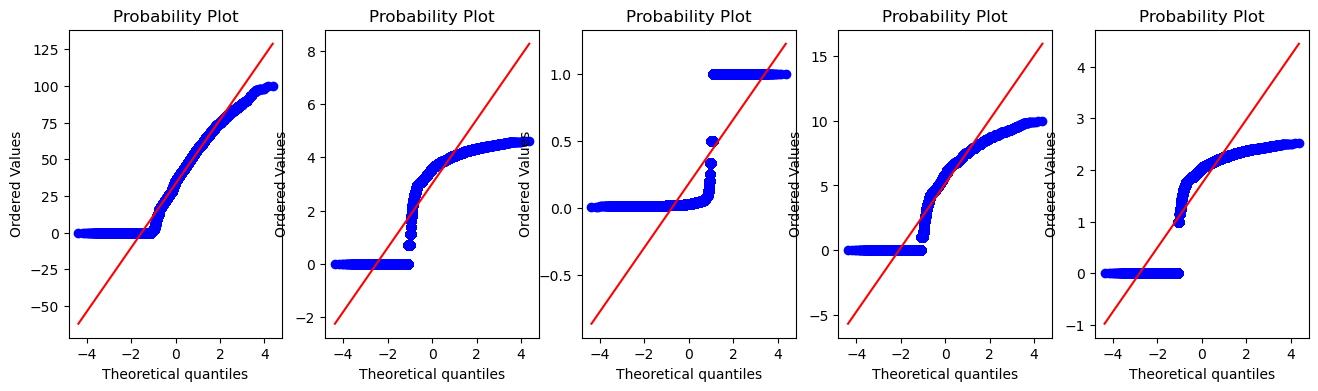

duration_ms original skewness: 10.814434004933338
logarithmic: -0.31958068443270016
reciprocal:  5.062710652230053
square-root: 1.7918392897162523
exponential: 0.3280005714079256


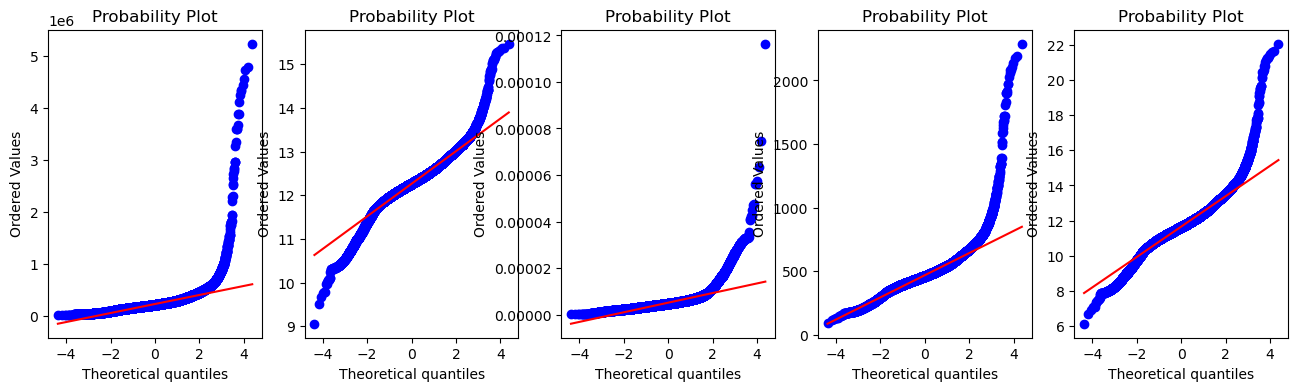

danceability original skewness: -0.4003991295600715
logarithmic: -0.7033043814280042
reciprocal:  1.0423257462450115
square-root: -1.078209424796711
exponential: -3.4689794311862756


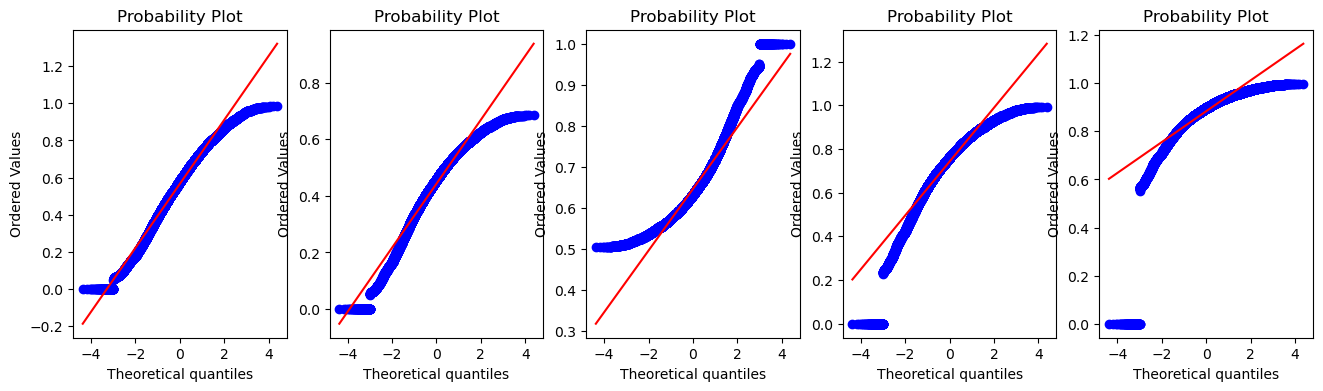

energy original skewness: -0.598542182428158
logarithmic: -0.8969101507400357
reciprocal:  1.2350332519840488
square-root: -1.2697363940462225
exponential: -2.2008891779513866


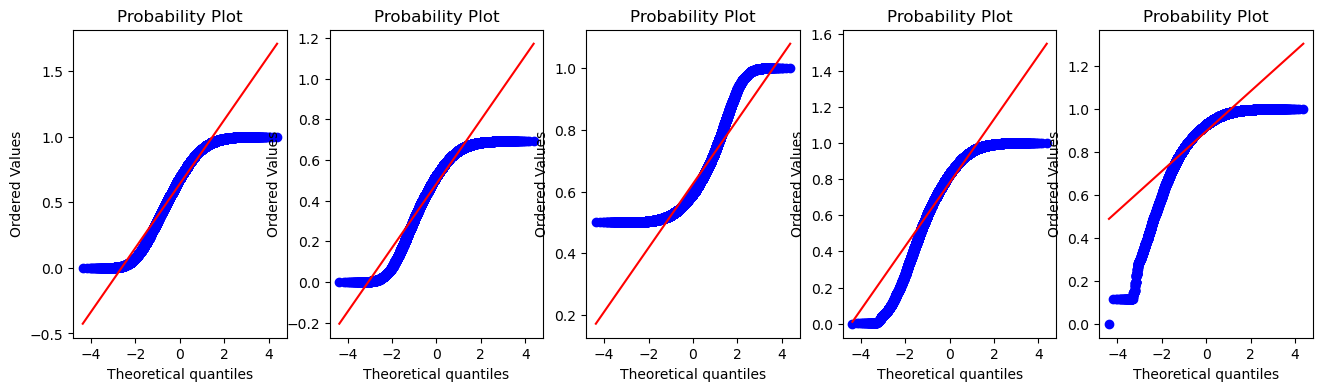

loudness original skewness: -2.0133133823721505
logarithmic: nan
reciprocal:  44.341700995068464
square-root: nan
exponential: nan


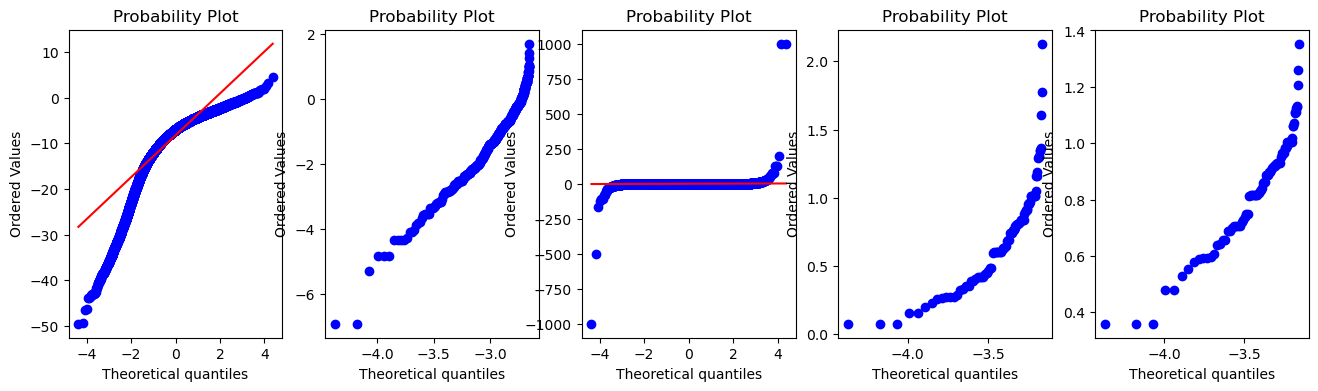

speechiness original skewness: 4.644508700286168
logarithmic: 3.7094268216147412
reciprocal:  -3.0189124109405174
square-root: 2.5106804244132315
exponential: 1.2585346167026825


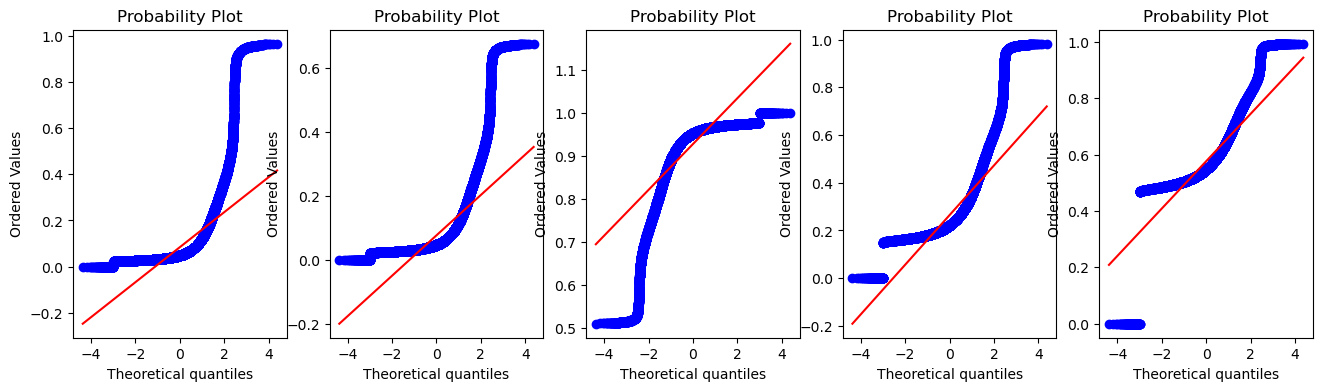

acousticness original skewness: 0.7302103030827026
logarithmic: 0.5532779927877304
reciprocal:  -0.3889970180312751
square-root: 0.19182418700584433
exponential: -0.45691650644198106


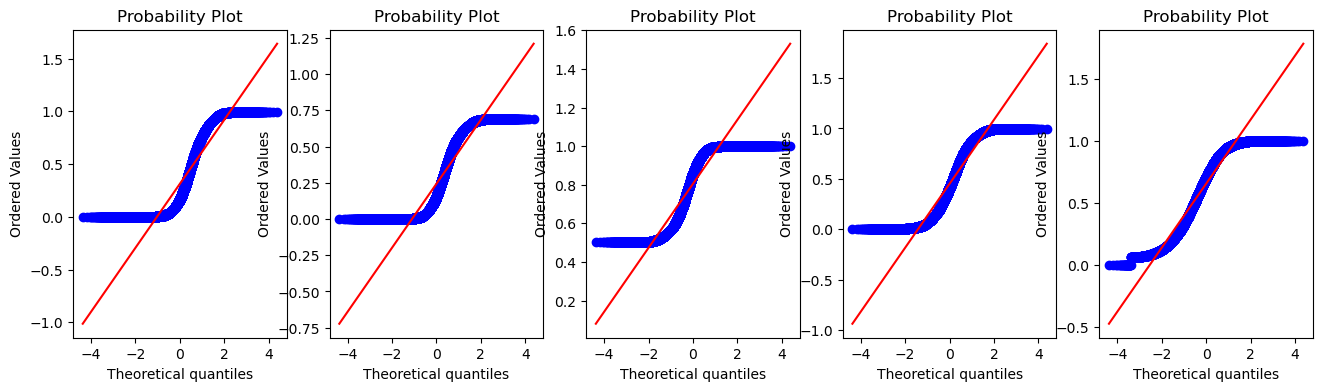

instrumentalness original skewness: 1.7377466866935405
logarithmic: 1.6547543527716166
reciprocal:  -1.5785769487599546
square-root: 1.4467885078056792
exponential: 0.929297080678929


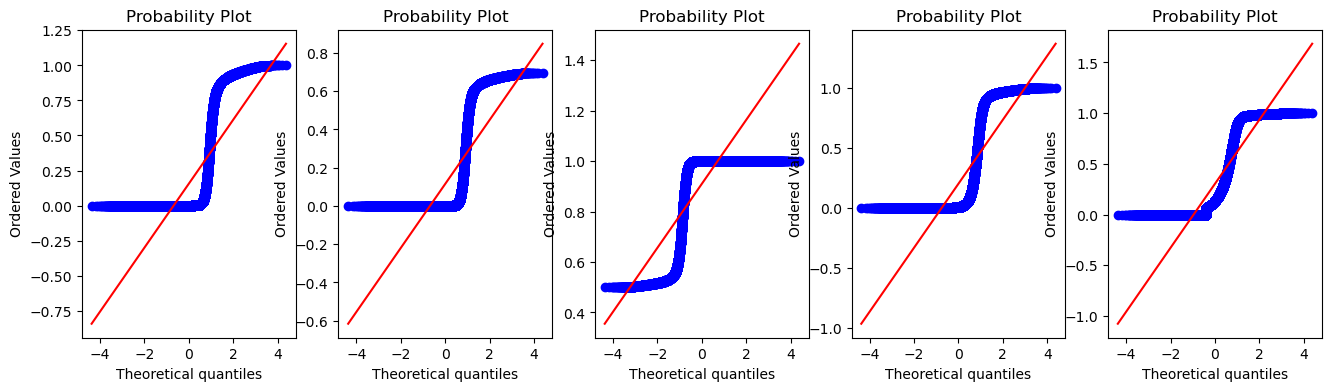

liveness original skewness: 2.1054497237799685
logarithmic: 1.7355487100916003
reciprocal:  -1.409425059871828
square-root: 1.3311332380750938
exponential: 0.8567637835174635


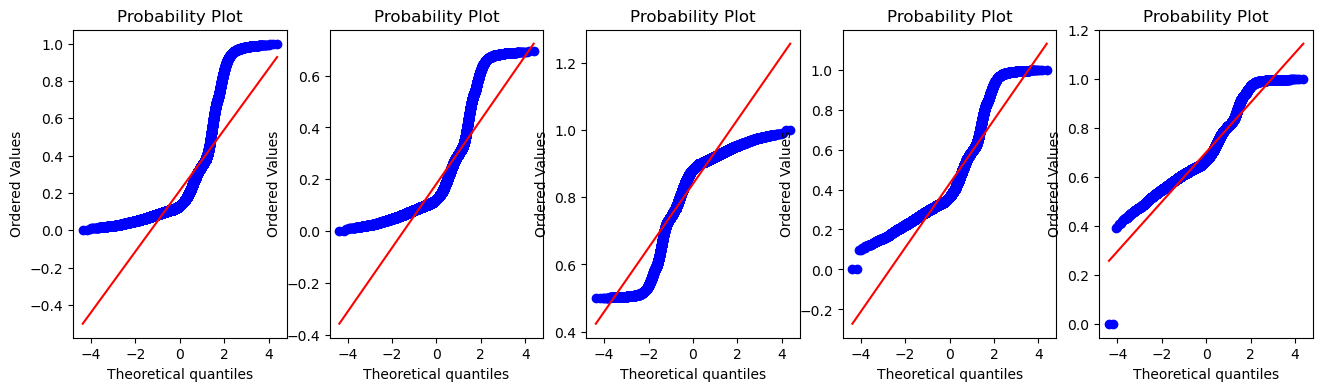

valence original skewness: 0.11477275798096229
logarithmic: -0.14268054744317982
reciprocal:  0.40566649459831094
square-root: -0.4685261380695686
exponential: -1.3963500280712502


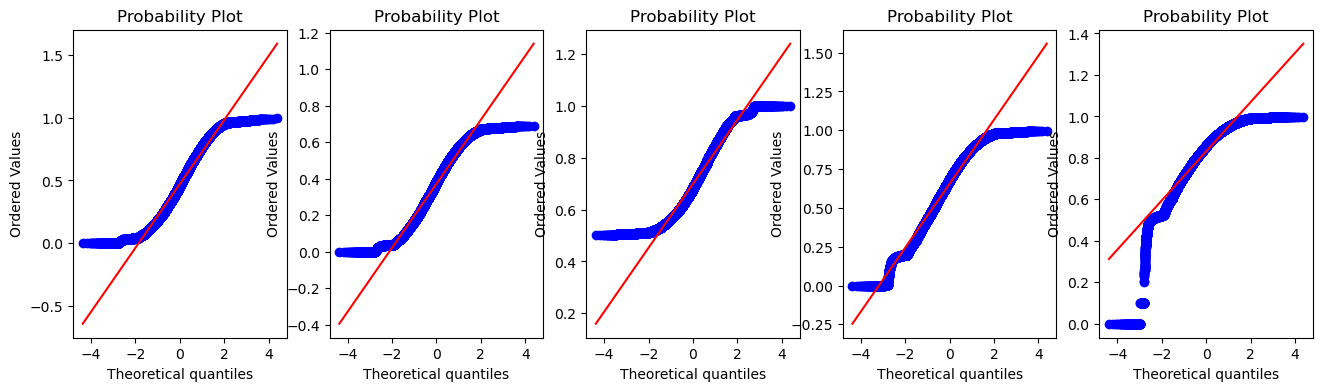

tempo original skewness: 0.23160111991386964
logarithmic: -5.502750438724598
reciprocal:  26.694049451308892
square-root: -0.5935911783686282
exponential: -5.885488448988584


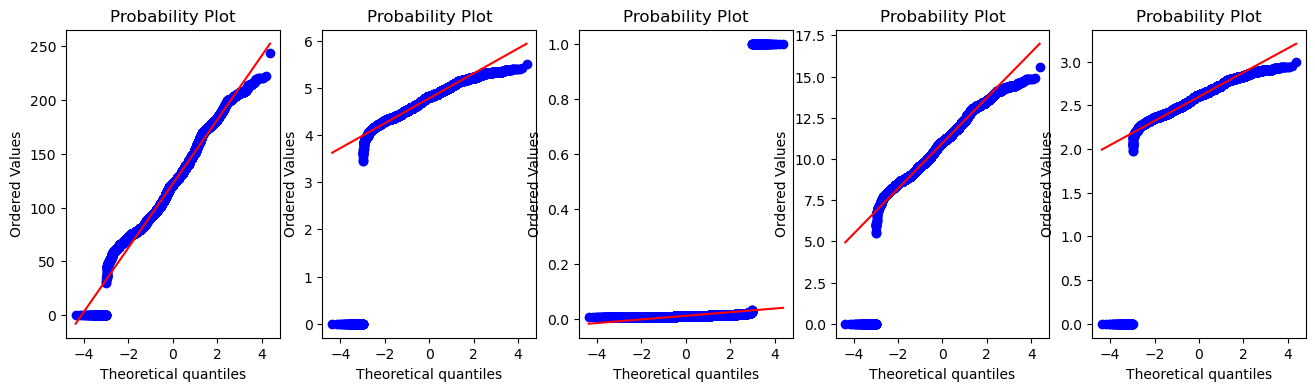

In [3]:
dataset_log=df.copy()
dataset_reci=df.copy()
dataset_sqrt=df.copy()
dataset_expo=df.copy()

from scipy import stats
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt

for feature in feature_continuous_numerical:
    dataset_log[feature]=np.log(dataset_log[feature]+1)
    dataset_reci[feature]=1/(dataset_reci[feature]+1)
    dataset_sqrt[feature]=dataset_sqrt[feature]**(1/2)
    dataset_expo[feature]=dataset_expo[feature]**(1/5)
    
for feature in feature_continuous_numerical:
    plt.figure(figsize=(16,4))
    plt.subplot(1,5,1)
    print(feature, 'original skewness:', skew(df[feature]))
    stats.probplot(df[feature], dist='norm', plot=plt)
          
    plt.subplot(1,5,2)
    print('logarithmic:', skew(dataset_log[feature]))
    stats.probplot(dataset_log[feature], dist='norm', plot=plt)
          
    plt.subplot(1,5,3)
    print('reciprocal: ', skew(dataset_reci[feature]))
    stats.probplot(dataset_reci[feature], dist='norm', plot=plt)
    
    plt.subplot(1,5,4)
    print('square-root:', skew(dataset_sqrt[feature]))
    stats.probplot(dataset_sqrt[feature], dist='norm', plot=plt)
    
    plt.subplot(1,5,5)
    print('exponential:', skew(dataset_expo[feature]))
    stats.probplot(dataset_expo[feature], dist='norm', plot=plt)
    
    plt.show()

Observations:

- Popularity: All transformation underpeformed, no change needed.
- Duration: Logaritmic and exponential transformations perform well, logaritmic transformation siglighly better.
- Danceability: All transformation underpeformed, no change needed.
- Energy: All transformation underpeformed, no change needed.
- Loudness: Many transformations are non aplicable, the rest greatly underperformed.
- Speechiness: Exponential transformation performed well.
- Acousticness: Square-root transformation performed well.
- Instrumentalness: Exponential transformation performed well.
- Liveness: Exponential transformation performed well.
- Valence: All transformation underpeformed, no change needed.
- Tempo: All transformation underpeformed, no change needed.

In [4]:
# Create a copy of the DataFrame 'df' and assign it to the variable 'skew_df'
skew_df = df.copy()

# Apply square root transformation to the 'acousticness' column of the DataFrame 'df'
# This transformation is taking the square root of each value in the column
df['acousticness'] = df['acousticness'] ** (1/2)

# Apply fifth root transformation to the columns 'speechiness', 'instrumentalness', and 'liveness'
# of the DataFrame 'df'
# This transformation is taking the fifth root of each value in the specified columns
df[['speechiness', 'instrumentalness', 'liveness']] = df[['speechiness', 'instrumentalness', 'liveness']] ** (1/5)

# Apply the natural logarithm (base e) transformation to the 'duration_ms' column of the DataFrame 'df'
# The transformation is taking the logarithm of (value + 1) for each entry in the column
df['duration_ms'] = np.log(df['duration_ms'] + 1)

# Display the first few rows of the modified DataFrame 'df'
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,12.348730,False,0.676,0.4610,1,-6.746,0,0.677746,0.179444,0.063221,0.814285,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,11.915794,False,0.420,0.1660,1,-17.235,1,0.597730,0.961249,0.088923,0.632214,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,12.258793,False,0.438,0.3590,0,-9.734,1,0.561269,0.458258,0.000000,0.651084,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,12.215696,False,0.266,0.0596,0,-18.515,1,0.515206,0.951315,0.147871,0.666983,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,12.200326,False,0.618,0.4430,2,-9.681,1,0.554878,0.684836,0.000000,0.607730,0.167,119.949,4,acoustic


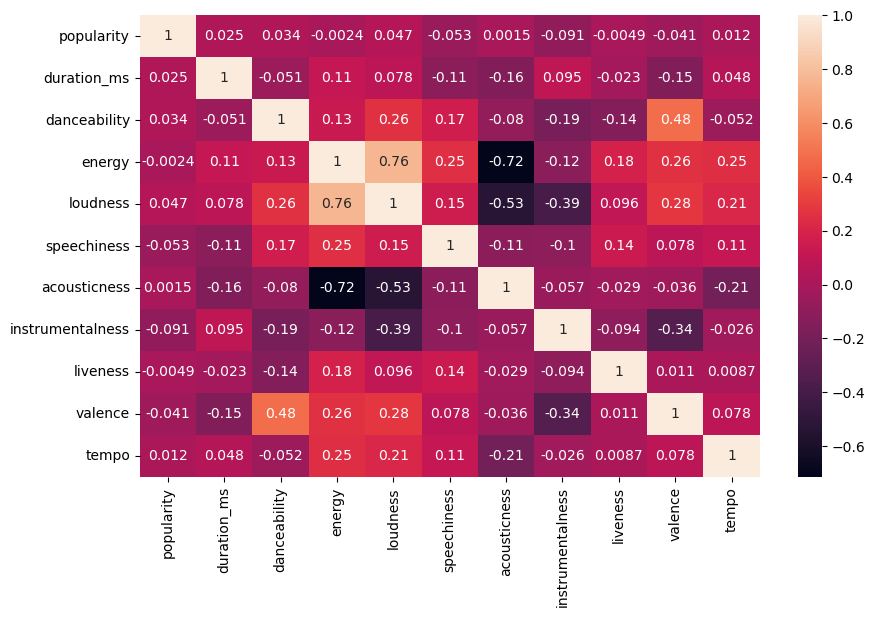

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df[feature_continuous_numerical].corr(), annot=True)
plt.show()

## Data scaling

In [6]:
# Import the necessary library for data scaling
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Select only the continuous numerical features from the original DataFrame,
# excluding 'popularity' and discrete numerical features
features_scaling = [feature for feature in feature_numerical if feature not in feature_discrete_numerical + ['popularity']]

# Create a copy of the original DataFrame 'df' to store the scaled data
scaled_df = df.copy()

# Fit the StandardScaler to the selected continuous numerical features and transform the values
# This step scales the data by removing the mean and scaling to unit variance
scaler.fit(scaled_df[features_scaling])
scaler.transform(scaled_df[features_scaling])

# Create a new DataFrame 'data_to_replace' with the scaled values and column names for the selected features
data_to_replace = pd.DataFrame(scaler.transform(scaled_df[features_scaling]), columns=features_scaling)

# Replace the original values in 'scaled_df' with the scaled values for each selected feature using a loop
for feature in features_scaling:
    scaled_df[feature] = data_to_replace[feature].values

# Create a copy of another DataFrame 'skew_df' (assumed to be the original skewed data) called 'scaled_skew_df'
scaled_skew_df = skew_df.copy()

# Fit the StandardScaler to the selected continuous numerical features in 'scaled_skew_df'
# and transform the values to scale the data
scaler.fit(scaled_skew_df[features_scaling])
scaler.transform(scaled_skew_df[features_scaling])

# Create a new DataFrame 'data_to_replace' with the scaled values and column names for the selected features
data_to_replace = pd.DataFrame(scaler.transform(scaled_skew_df[features_scaling]), columns=features_scaling)

# Replace the original values in 'scaled_skew_df' with the scaled values for each selected feature using a loop
for feature in features_scaling:
    scaled_skew_df[feature] = data_to_replace[feature].values

# Display the first few rows of the 'scaled_df' DataFrame
scaled_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,0.220962,False,0.628394,-0.721328,1,0.298800,0,1.101557,-0.815926,-0.672445,1.078285,0.928984,-1.142994,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,-0.916420,False,-0.847891,-1.896382,1,-1.794228,1,0.234607,1.533645,-0.600612,-0.653979,-0.799395,-1.490909,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,-0.015315,False,-0.744089,-1.127618,0,-0.297440,1,-0.160432,0.021997,-0.849140,-0.474446,-1.366520,-1.529510,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,-0.128536,False,-1.735968,-2.320198,0,-2.049645,1,-0.659502,1.503789,-0.435859,-0.323181,-1.277786,1.987275,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,-0.168915,False,0.293923,-0.793026,2,-0.286864,1,-0.229681,0.702936,-0.849140,-0.886924,-1.185194,-0.074292,4,acoustic


In [7]:
# Drop the columns specified in 'feature_discrete_numerical' from the DataFrame 'skew_df'
skew_df.drop(feature_discrete_numerical, axis=1, inplace=True)

# Drop the columns specified in 'feature_discrete_numerical' from the DataFrame 'df'
df.drop(feature_discrete_numerical, axis=1, inplace=True)

# Drop the columns specified in 'feature_discrete_numerical' from the DataFrame 'scaled_df'
scaled_df.drop(feature_discrete_numerical, axis=1, inplace=True)

# Drop the columns specified in 'feature_discrete_numerical' from the DataFrame 'scaled_skew_df'
scaled_skew_df.drop(feature_discrete_numerical, axis=1, inplace=True)

# Create a list 'feature_categorical' containing column names that are not in 'feature_numerical'
# (assumed to be categorical features)
feature_categorical = [feature for feature in df.columns if feature not in feature_numerical]

# Drop the columns specified in 'feature_categorical' from the DataFrame 'skew_df'
skew_df.drop(feature_categorical, axis=1, inplace=True)

# Drop the columns specified in 'feature_categorical' from the DataFrame 'df'
df.drop(feature_categorical, axis=1, inplace=True)

# Drop the columns specified in 'feature_categorical' from the DataFrame 'scaled_df'
scaled_df.drop(feature_categorical, axis=1, inplace=True)

# Drop the columns specified in 'feature_categorical' from the DataFrame 'scaled_skew_df'
scaled_skew_df.drop(feature_categorical, axis=1, inplace=True)

# Display the first few rows of the DataFrame 'scaled_df'
scaled_df.head()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,73,0.220962,0.628394,-0.721328,0.298800,1.101557,-0.815926,-0.672445,1.078285,0.928984,-1.142994
1,55,-0.916420,-0.847891,-1.896382,-1.794228,0.234607,1.533645,-0.600612,-0.653979,-0.799395,-1.490909
2,57,-0.015315,-0.744089,-1.127618,-0.297440,-0.160432,0.021997,-0.849140,-0.474446,-1.366520,-1.529510
3,71,-0.128536,-1.735968,-2.320198,-2.049645,-0.659502,1.503789,-0.435859,-0.323181,-1.277786,1.987275
4,82,-0.168915,0.293923,-0.793026,-0.286864,-0.229681,0.702936,-0.849140,-0.886924,-1.185194,-0.074292


In [8]:
# Save the DataFrame 'skew_df' to a CSV file named 'processed_skewed_numerical_dataset.csv'
# in the directory specified by 'path_original_data'
skew_df.to_csv(os.path.join(path_original_data, 'processed_skewed_numerical_dataset.csv'), index=False)

# Save the DataFrame 'df' to a CSV file named 'processed_numerical_dataset.csv'
# in the directory specified by 'path_original_data'
df.to_csv(os.path.join(path_original_data, 'processed_numerical_dataset.csv'), index=False)

# Save the DataFrame 'scaled_df' to a CSV file named 'processed_scaled_numerical_dataset.csv'
# in the directory specified by 'path_original_data'
scaled_df.to_csv(os.path.join(path_original_data, 'processed_scaled_numerical_dataset.csv'), index=False)

# Save the DataFrame 'scaled_skew_df' to a CSV file named 'processed_scaled_sweked_numerical_dataset.csv'
# in the directory specified by 'path_original_data'
scaled_skew_df.to_csv(os.path.join(path_original_data, 'processed_scaled_sweked_numerical_dataset.csv'), index=False)
